Mir Tahmid

mirtahmid@gmail.com

# Import Necessary Libraries

In [1]:
!pip install skimpy summarytools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 52.4 MB/s eta 0:00:00:00:010:01m
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.10.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.


In [2]:
# Import necessary libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tpot import TPOTRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from skimpy import skim
from summarytools import dfSummary

warnings.filterwarnings('ignore')

# Load and glimpse of Dataset

In [3]:
# Load dataset
iPAGE_data = pd.read_csv('/kaggle/input/ipagedata/SoilData sample iPAGE.csv')
dfSummary(iPAGE_data)
# Initial overview of data using skimpy
#skim(iPAGE_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,SN[int64],Mean (sd) : 24.0 (13.7)min < med < max:1.0 < 24.0 < 47.0IQR (CV) : 23.0 (1.8),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACVElEQVR4nO3av8raUBjH8ecYlfiHBJHq5tKx0CGjF9GL7SV08AocuryTmyAhYvoGY0yXvtBJc5LS+IPvZ/b4PIQvinhcXdcGvLpB3wsATQyfvcA5NzGzccv3H5jZveVZM7NrXdfvbQ523LvP2crPrMvuD/d+GKpzbrJcLr9FUbTwnVpV1SjP88/z+fxtMBiUvufNzM7nc+qc++774Lvs3eds5WfWdfdnez/7RB1HUbTYbrfvcRwXPoMPh8Niv99/SpLk53q9Tn3OmpllWRbudrvF6XQam5nvJ0TrvfucrfzMuuzeZO+nX/1mZnEcF6vV6pfP8DRNJ2Zms9nM++xfJi3PmVm7vfucrfzM/sHuD/fmxxQkECokECokECokECokECokECokECokECokECokNPoLtS9VVY3MLHLO+R6N7vf7SHV2F6p7P/OyoeZ5PirL8utmswmCIPC6JFGWZVhV1ZeiKH6Ymff/zn3O7kJ17yZeNtTr9ToMw3CaJEnhexvnz02e6e12C9Rmd6G6dxMvG+qHNrdxPm7yKM/uQnXvR/gxBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgnDJi/Ksiz0fePL5RKameV5Hh6Px+n/PK86W3Xvrueb9PUbQrSNwUGfYyQAAAAASUVORK5CYII="">",0(0.0%)
2,Soil Series (Area Wise)[object],1. Gongachora2. Tistar Poli3. Jamun4. Polashbari5. Loshkora6. Kaunia7. Tistar Bele,22 (46.8%)11 (23.4%)6 (12.8%)3 (6.4%)3 (6.4%)1 (2.1%)1 (2.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC3UlEQVR4nO3dTWobWQBG0acgQjKRMAYvRovIYrMI7cYY16AdMlEP8kMS2kFBpVsV9TmzzB7mUuIV9ZHN6XQaUHiz9AH4/xAbGbGRERsZsZHZjDHejzHeLn2Qlft8Op1elj7E3257f3//Ybfb3S19kDWbpulps9l8FNxltrvd7u5wOLzs9/tPSx9mjZ6fn98dj8e7x8fHt2MMsV1gO8YY+/3+08PDwz9LH2bF3i99gFvggkBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmO8aXz2iWPsha+dvMZztN09PxeLwbPqN51TRNT2OMz0uf42/ns/Dz+Cx8BhuLeCprfLJ5ityo1Q1ejEtu16oGL8Ylt22Ngxe34hvlpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZFZ1bpqLefgOla3rrJkul02CGSsq8hc48nmycR/mn1dZR3Fa2ZdV1lH8TvXWFet4lbL+nipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmbWwYvBCr8z++DFYIXX+CycjMELGRcEMn/yM+rnkYucva6ymuJSZ62rrKaYw5+sq6ymuIgLAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5mz1lVWU8zh7HWV1RSX8lk4GesqMp5sZAxeyBi8kDF4IeOlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2R8Fk7G4IWMCwKZX39G/VRyNT+tqyyouKY339ZVh8Ph5Wt0c/7fo/Dd93XV139bUHE1LghkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkzlpXwRx+XFdZUHFVPgsnY11FxpONjMELGYMXMgYvZLzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryNggkLGuIuOCQEZsZMRGRmxk/gUERGBXYaLPsgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Land Type[object],1. High Land2. Medium High Land3. Medium Low Land,22 (46.8%)18 (38.3%)7 (14.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmklEQVR4nO3bUUrjYBiF4S9DkPEmoRS6mC5iFjuLyG5KaS5UvIkXwiDCgKA5fzTPs4Kv5aUlpadblqUg4VfrA9iPrqruq+qu9SEb97wsy2PrI767/ng8/hmG4dD6kC2b5/nadd1fwX1OPwzD4Xw+P47j+NT6mC263W6/p2k6XC6Xu6oS2yf0VVXjOD6dTqeH1sds2H3rA34CDwjEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiOmrXv+z1fqQrfLefJ1+nufrNE2H8p+t/5rn+VpVz63v+O5sED7GBuELdKZ8pOztk80nVEO7WldZSbW1m3WVlVR7e1tXeeJuyI+6xIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IjZzbpqD69x63a1rrKSassGgRjrKmI8IBCz9teory3+WXXKZzrHW6tN+UzneG/tKd+P/zmFj/OAQIzYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2Y1aZ8pnO8t+qUz3SOt2wQiDHlI+YFSryjSqR4TS4AAAAASUVORK5CYII="">",0(0.0%)
4,Soil Type[object],1. Loamy soil2. Clay Soil3. Loamy soil 4. Clay loam Soil5. Sandy loam Soil,41 (87.2%)3 (6.4%)1 (2.1%)1 (2.1%)1 (2.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACKklEQVR4nO3dMU7bYACG4T8oQmVJFCFxmByih+0hcpsI4aEglnQordoOVVDtF0qeZ8tieXhly5Y/WJ1OpwGFq7c+AS6H2MiIjcxqjHEzxrh+6xPhXXo+nU6Pcx1sfXt7+3mz2ezmOiAfxzRN9

# Quick View of the Dataset

In [4]:
# Initial overview of data using skimpy
skim(iPAGE_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 47     │ │ float64     │ 8     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean      ┃ sd       ┃ p0      ┃ p25      ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ SN            │   0 │     0 │        24 │    13.71 │       1 │     12.5 │     24 │   35.5 │    47 │ ▇▇▇▇▇▇ │  │
│ │ pH            │   0 │     0 │     5.509 │   0.4624 │     4.8 │      5.2 │    5.4 │    5.8 │   7.2 │  ▅▇▅▃  │  │
│ │ SOC (%)       │   0 │     0 │     1.621 │    1.134 │     0.1 │     0.84 │    1.4 │   2.06 │  5.25 │ ▆▇▃▂ ▁ │  │
│ │ N (%)         │   0 │     0 │   0.07044 │  0.07049 │  0.0008 │  0.00185 │   0.06 │    0.1 │  0.26 │ ▇▅▃▁▁▁ │  │
│ │ P (ug/g)      │   0 │     0 │     30.71 │    35.17 │     2.6 │    10.05 │     15 │     26 │   175 │  ▇ ▂   │  │
│ │ K (meq/100)   │   0 │     0 │    0.5396 │     2.04 │    0.04 │    0.135 │   0.25 │    0.3 │  14.2 │   ▇    │  │
│ │ S (ug/g)      │   0 │     0 │     16.83 │    12.66 │     0.4 │    9.585 │  14.57 │  19.61 │  60.3 │ ▃▇▁▁ ▁ │  │
│ │ B (ug/g)      │   0 │     0 │    0.2219 │   0.1323 │    0.03 │    0.145 │   0.17 │  0.265 │  0.63 │ ▃▇▃▂ ▁ │  │
│ │ Mn (ug/g)     │   0 │     0 │     16.12 │    12.77 │       1 │      5.9 │  12.18 │   24.2 │  52.8 │ ▇▅▅ ▁▁ │  │
│ └───────────────┴─────┴───────┴───────────┴──────────┴─────────┴──────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Soil Series (Area Wise)               │     0 │         0 │                      1.3 │                  59 │  │
│ │ Land Type                             │     0 │         0 │                      2.5 │                 119 │  │
│ │ Soil Type                             │     0 │         0 │                      2.1 │                  97 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Preprocess Data and Perform EDA

This segment includes one-hot encoding categorical features, visualizing feature distributions, and generating a correlation matrix.

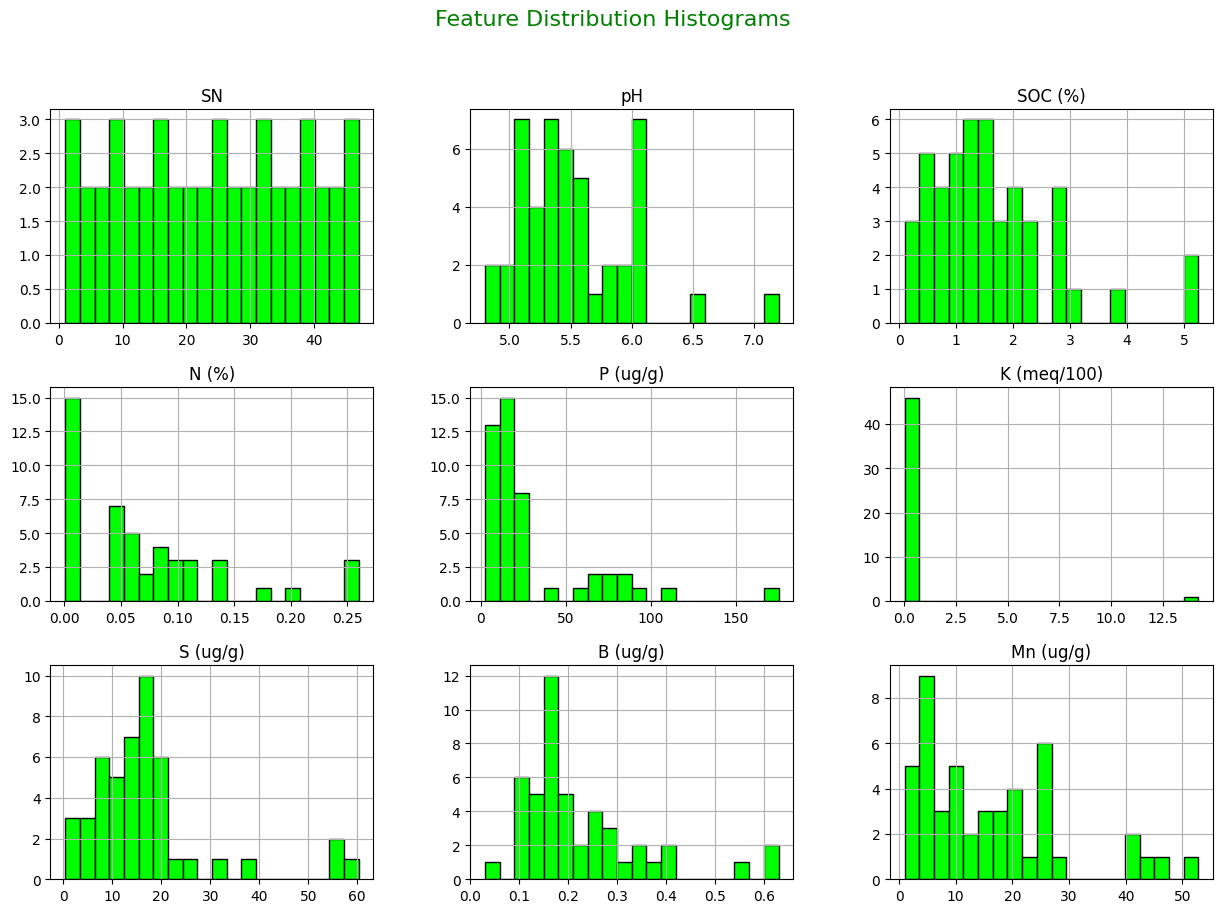

In [5]:
# Preprocessing: One-hot encode categorical variables
iPAGE_data_encoded = pd.get_dummies(iPAGE_data, columns=['Soil Series (Area Wise)', 'Land Type', 'Soil Type'], drop_first=True)

# Exploratory Data Analysis (EDA)
# Histograms for feature distribution with lime color theme
iPAGE_data_encoded.hist(figsize=(15, 10), bins=20, edgecolor='black', color='lime')
plt.suptitle('Feature Distribution Histograms', color='green', fontsize=16)
plt.show()

# Correlation Analysis

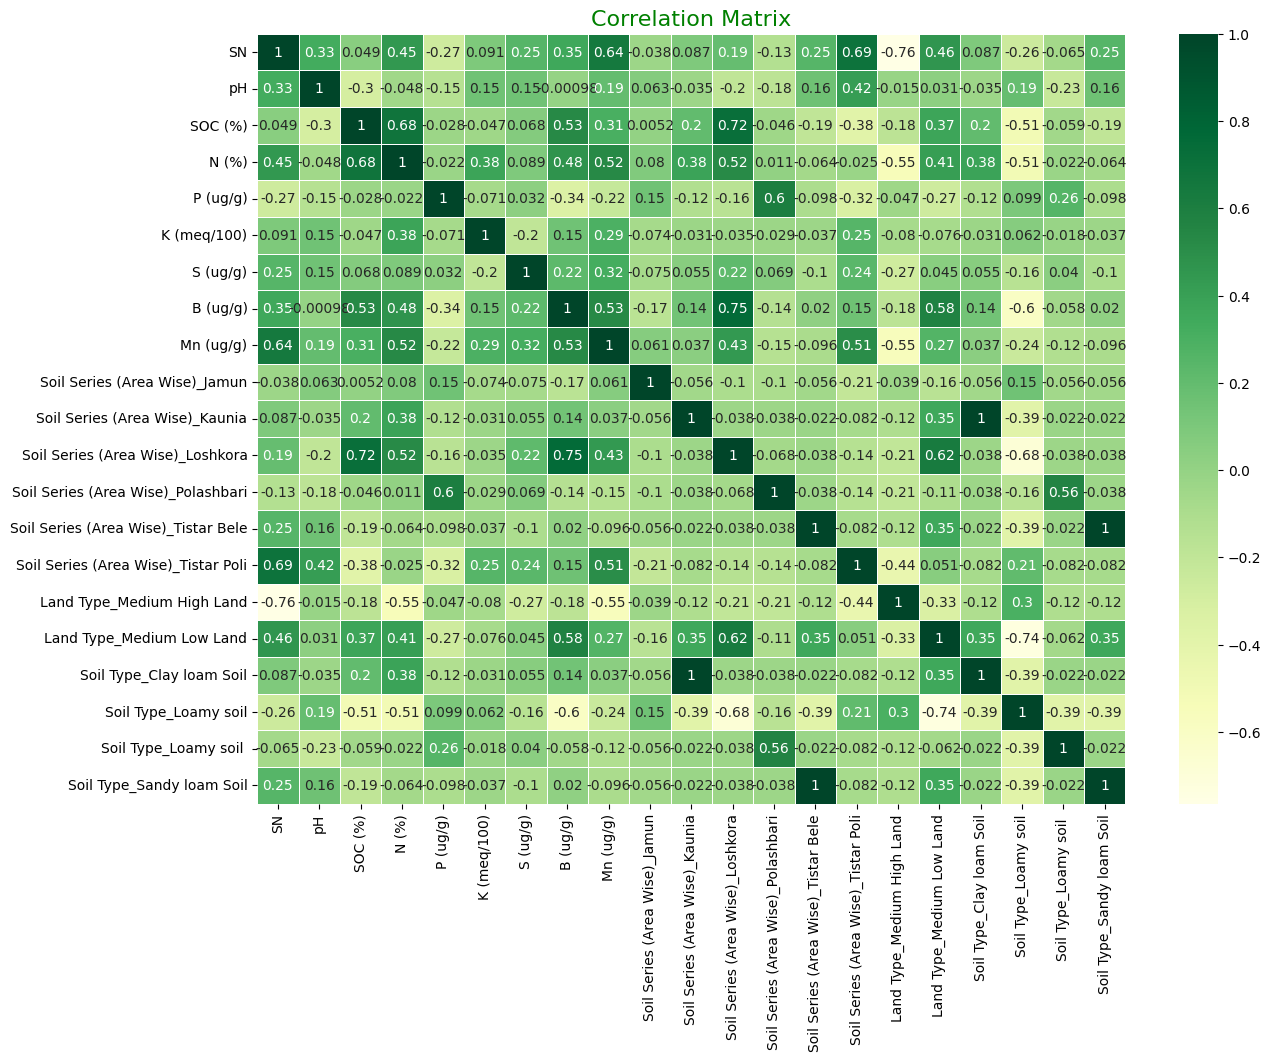

In [6]:
# Correlation matrix with lime color theme
plt.figure(figsize=(14, 10))
correlation = iPAGE_data_encoded.corr()
sns.heatmap(correlation, annot=True, cmap='YlGn', linewidths=0.5)
plt.title('Correlation Matrix', color='green', fontsize=16)
plt.show()

# Define Features and Target Variables

We use X to include all features except 'B (ug/g)' to predict boron (B)

In [7]:
X = iPAGE_data_encoded.drop(columns=['B (ug/g)'])
y_b = iPAGE_data_encoded['B (ug/g)']
y_soc = iPAGE_data_encoded['SOC (%)']

# Train-Test Split and Scaling

In [8]:
# Split the data for both Boron
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_b, test_size=0.3, random_state=42)
X_train_soc, X_test_soc, y_train_soc, y_test_soc = train_test_split(X, y_soc, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_b_scaled = scaler.fit_transform(X_train_b)
X_test_b_scaled = scaler.transform(X_test_b)
X_train_soc_scaled = scaler.fit_transform(X_train_soc)
X_test_soc_scaled = scaler.transform(X_test_soc)

# AutoML with TPOT

In [9]:
# AutoML with TPOT for Boron (B)
tpot_b = TPOTRegressor(verbosity=2, generations=5, population_size=50, random_state=42)
tpot_b.fit(X_train_b_scaled, y_train_b)

# AutoML with TPOT for SOC (TOC)
tpot_soc = TPOTRegressor(verbosity=2, generations=5, population_size=50, random_state=42)
tpot_soc.fit(X_train_soc_scaled, y_train_soc)

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.008044845003395388

Generation 2 - Current best internal CV score: -0.008044845003395388

Generation 3 - Current best internal CV score: -0.008044845003395388

Generation 4 - Current best internal CV score: -0.00545010558917

Generation 5 - Current best internal CV score: -0.00545010558917

Best pipeline: AdaBoostRegressor(OneHotEncoder(OneHotEncoder(input_matrix, minimum_fraction=0.1, sparse=False, threshold=10), minimum_fraction=0.05, sparse=False, threshold=10), learning_rate=0.5, loss=square, n_estimators=100)


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7.03936565768508e-32

Generation 2 - Current best internal CV score: -7.03936565768508e-32

Generation 3 - Current best internal CV score: -7.03936565768508e-32

Generation 4 - Current best internal CV score: -7.03936565768508e-32

Generation 5 - Current best internal CV score: -7.03936565768508e-32

Best pipeline: LassoLarsCV(input_matrix, normalize=False)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

# Evaluate Performance for B(Boron)

In [11]:
# Evaluate performance for Boron (B)
y_pred_b = tpot_b.predict(X_test_b_scaled)
r2_b = r2_score(y_test_b, y_pred_b)
mae_b = mean_absolute_error(y_test_b, y_pred_b)
mse_b = mean_squared_error(y_test_b, y_pred_b)
rmse_b = np.sqrt(mse_b)

print("Boron (B) Prediction Metrics:")
print(f"R²: {r2_b}")
print(f"MAE: {mae_b}")
print(f"MSE: {mse_b}")
print(f"RMSE: {rmse_b}")


Boron (B) Prediction Metrics:
R²: 0.44457441093263017
MAE: 0.06807743541861187
MSE: 0.009279310174685525
RMSE: 0.09632917613415742


# Evaluate Performance for SOC (%)

In [12]:
# Predictions and evaluation for SOC (%)
y_pred_soc = tpot_soc.predict(X_test_soc_scaled)
r2_soc = r2_score(y_test_soc, y_pred_soc)
mae_soc = mean_absolute_error(y_test_soc, y_pred_soc)
mse_soc = mean_squared_error(y_test_soc, y_pred_soc)
rmse_soc = np.sqrt(mse_soc)

print("SOC (%) Prediction Metrics:")
print(f"R²: {r2_soc}")
print(f"MAE: {mae_soc}")
print(f"MSE: {mse_soc}")
print(f"RMSE: {rmse_soc}")

SOC (%) Prediction Metrics:
R²: 1.0
MAE: 2.294460917558657e-16
MSE: 6.656013887802288e-32
RMSE: 2.579925170969555e-16
